# Data Analysis_Part B_An example from the car Industry

This is an analysis based to the methodology of IBM course.

At this part we will perform an EDA. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import ipywidgets
import tqdm

We need to import our dataframe from the previous part (Part A).

In [2]:
df = pd.read_csv("automobile.csv")
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,...,5000.0,21,8.703704,16500.0,11.190476,Medium,False,True,True,False
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,...,5500.0,24,7.833333,13950.0,9.791667,Medium,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,...,5500.0,18,10.681818,17450.0,13.055556,Medium,False,True,True,False
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.917012,...,5500.0,19,9.400000,15250.0,12.368421,Medium,False,True,True,False


## 1. Analyzing Individual Feature Patterns Using Visualization

In [3]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.051667,0.005949,0.546429
stroke,-0.051667,1.000000,0.184118,0.038243
compression-ratio,0.005949,0.184118,1.000000,-0.190423
horsepower,0.546429,0.038243,-0.190423,1.000000


(0.0, 53327.82526840932)

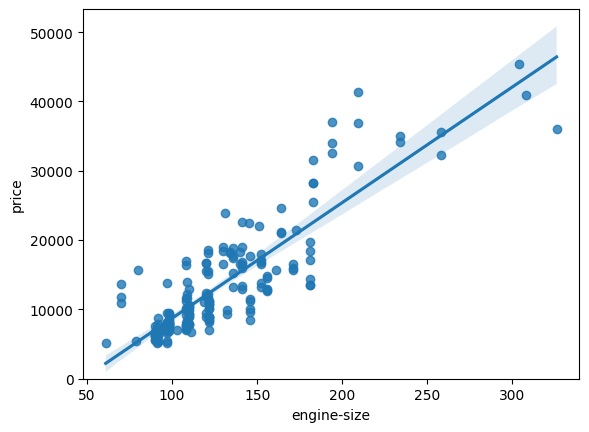

In [4]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [5]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872337
price,0.872337,1.000000


As expect, as the engine size goes up, the price goes up.

<Axes: xlabel='highway-L/100km', ylabel='price'>

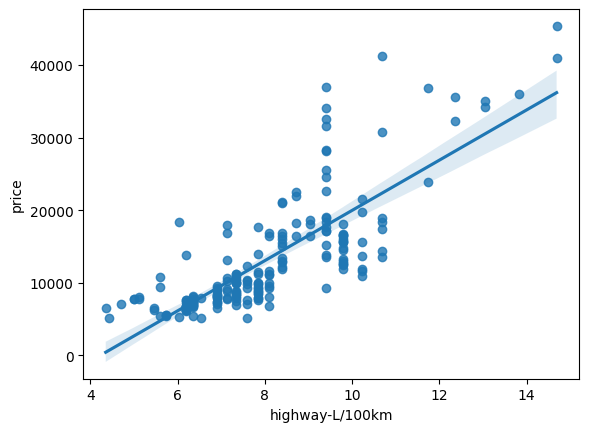

In [6]:
sns.regplot(x="highway-L/100km", y="price", data=df)

In [7]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801313
price,0.801313,1.000000


This is a positive linear relashionship.

How about the "peak-rpm" - Could it work as a predictor variable of price?

<Axes: xlabel='peak-rpm', ylabel='price'>

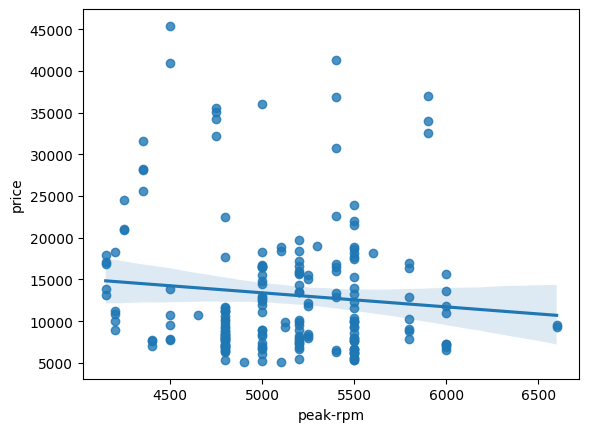

In [8]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [9]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101593
price,-0.101593,1.000000


No, as we see peak rpm does not seem like a good predictor of the price.

How about the correlation between stroke and price?

In [10]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.083153
price,0.083153,1.000000


<Axes: xlabel='stroke', ylabel='price'>

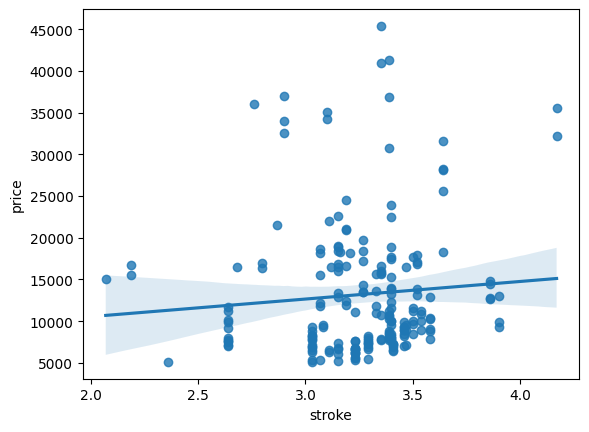

In [11]:
sns.regplot(x="stroke", y="price", data=df)

## 2. Exploring categorical variables

We will use boxplots to explore categorial variables.

<Axes: xlabel='body-style', ylabel='price'>

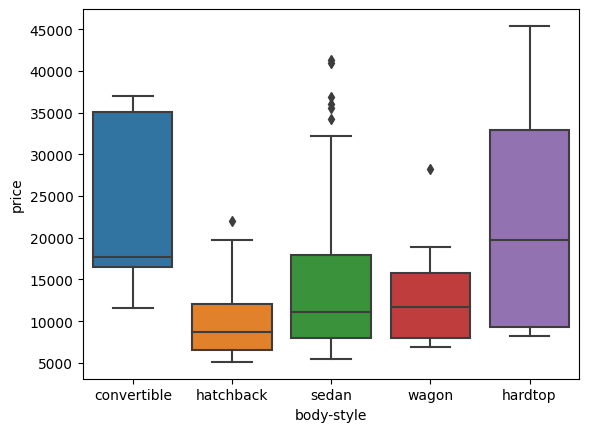

In [12]:
sns.boxplot(x="body-style", y="price", data=df)

Here we see that the distributions of price between the different body-style categories has an overlap.

Body-style variable can not work as a predictor of price. 

Let's examine engine "engine-location" and "price"

<Axes: xlabel='engine-location', ylabel='price'>

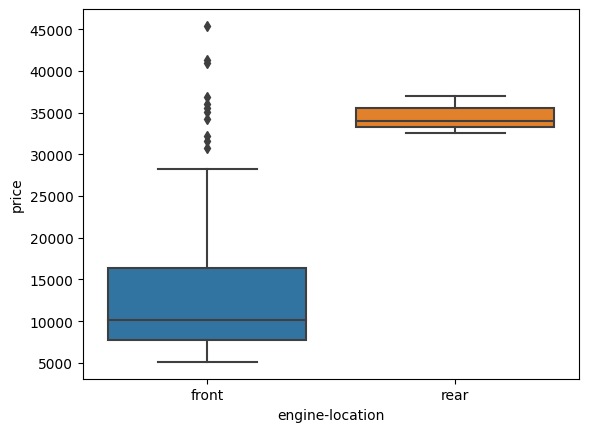

In [13]:
sns.boxplot(x="engine-location", y="price", data=df)

Engine-location could work as a good predictor of price. 

Let's also check the drive wheels:

<Axes: xlabel='drive-wheels', ylabel='price'>

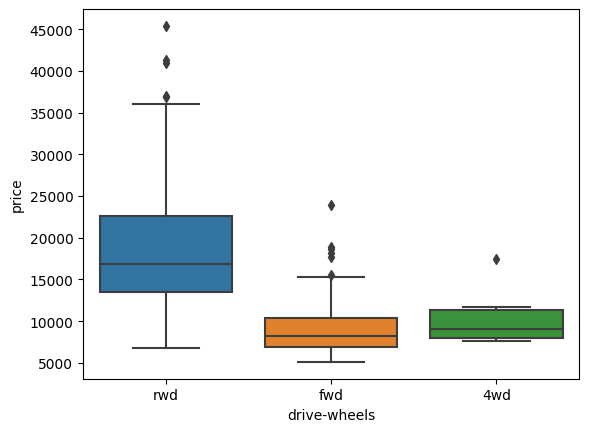

In [14]:
sns.boxplot(x="drive-wheels", y="price", data=df)

The price between the different drive-wheels categories differs, so as variable could potentially be a predictor of price.

## 3. Descriptive Statistical Analysis¶

Let's see our data.

In [15]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,200.000000,204.000000
mean,0.823529,122.000000,98.806373,0.836497,0.911710,0.898813,2555.602941,126.892157,3.329050,3.259687,10.148137,103.230392,5125.990099,25.240196,8.031066,13205.690000,9.943442
std,1.239035,31.758944,5.994144,0.059405,0.029692,0.040550,521.960820,41.744569,0.271331,0.311905,3.981000,40.855758,478.071104,6.551513,1.853735,7966.982558,2.577956
min,-2.000000,65.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,3.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.000000,94.500000,0.799135,0.886238,0.869565,2145.000000,97.000000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,6.815768,7775.000000,7.833333
50%,1.000000,122.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,7.833333,10270.000000,9.791667
75%,2.000000,137.000000,102.400000,0.880346,0.925311,0.928094,2939.250000,142.000000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.750000,12.368421
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


In [16]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,204,204,204,204,204,204,204,204,204
unique,22,2,5,3,2,7,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,116,96,120,201,148,158,93,111


In [17]:
df['drive-wheels'].value_counts()

drive-wheels
fwd    120
rwd     75
4wd      9
Name: count, dtype: int64

In [18]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,75
4wd,9


In [19]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,120
rwd,75
4wd,9


In [20]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,201
rear,3


Engine location is no good predictor for the price as there are one 3 cars with rear engine location.

## 4. Grouping

Let's explore how many categories of drive wheels we have and do our first grouping.

In [21]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one.head()

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0


In [23]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


We will pivot this, to see it better.

In [24]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                             
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333  \
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [25]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                             
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                 0.00      0.000000   7603.000000  12647.333333  \
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's look at the body style in relation with the price.

In [26]:
df_group_two = df[['body-style','price']]
grouped_test_bodystyle  = df_group_two.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


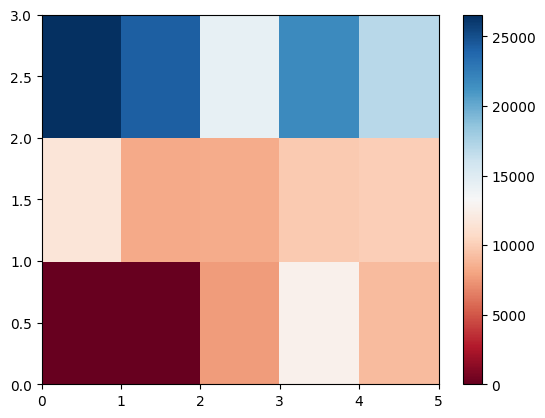

In [27]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The default labels are no useful information to us. Let's change that:

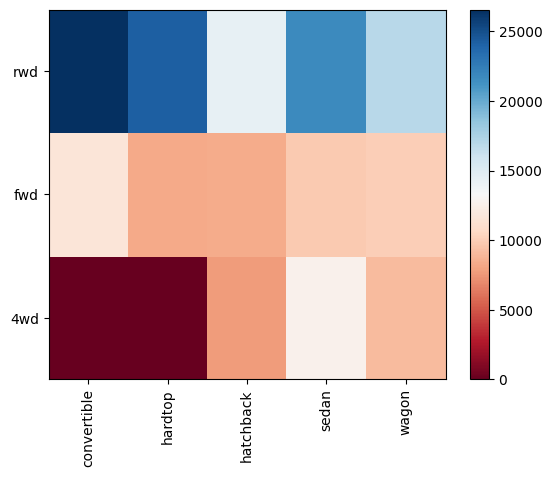

In [28]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## 4. Pearson

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

**Wheel-Base vs. Price**

In [29]:
missing_data = df["price"].isnull()
missing_data

0      False
1      False
2      False
3      False
4      False
       ...  
199    False
200    False
201    False
202    False
203    False
Name: price, Length: 204, dtype: bool

In [30]:
df['price'].isnull().values.any()

True

In [31]:
count_nan = df['price'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 4


In [32]:
df.dropna(subset = ['price'], inplace = True, axis = 0)

In [33]:
count_nan = df['price'].isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: 0


In [34]:
#df[df['price'].isna()]

**Wheel Base vs Price**

In [35]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5891470005448702  with a P-value of P = 4.45701950205028e-20


P-value is  < 0.001: the correlation is statistically significant. 

Linear relationship isn't extremely strong (~0.585).

**Horsepower vs Price**

In [36]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7940683687038868  with a P-value of P =  1.0979455904744663e-44


P-value is  < 0.001: the correlation is statistically significant. 

Linear relationship is quite strong (~0.809, close to 1).

**Length vs Price**

In [37]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6910440897821903  with a P-value of P =  9.960963222348494e-30


P-value is  is <0.001: the correlation is statistically significant.

Linear relationship is moderately strong (~0.691).

**Width vs Price**

In [39]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7527948631832603  with a P-value of P = 8.2567141483106e-38


P-value is < 0.001: the correlation is statistically significant.

Linear relationship is quite strong (\~0.751).


**Engine-Size vs. Price**

In [41]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723367498521141  with a P-value of P = 1.8977171466564964e-63


P-value is < 0.001: the correlation is statistically significant.

Linear relationship is is very strong (~0.872).

**Bore vs Price**

In [42]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5434325935555682  with a P-value of P =   9.2074875241946e-17


P-value is < 0.001: the correlation is statistically significant.

Linear relationship is moderate (~0.543).

**City-mpg vs. Price**

In [43]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6871861020862684  with a P-value of P =  2.7292565684792725e-29


P-value is < 0.001: the correlation is statistically significant.

Linear relationship is negative and moderately strong (~0.687).

**Highway-mpg vs. Price**

In [45]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.8013130144661037  with a P-value of P =  4.67904202425645e-46


P-value is < 0.001: the correlation is statistically significant.

Linear relationship is strong (~0.801).

## 5. ANOVA

**Drive Wheels**

In [46]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,16500.0
1,rwd,16500.0
2,fwd,13950.0
3,4wd,17450.0
4,fwd,15250.0
8,4wd,NaN


In [47]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,16500.0
1,rwd,hatchback,16500.0
2,fwd,sedan,13950.0
3,4wd,sedan,17450.0
4,fwd,sedan,15250.0
...,...,...,...
199,rwd,sedan,16845.0
200,rwd,sedan,19045.0
201,rwd,sedan,21485.0
202,rwd,sedan,22470.0


In [48]:
grouped_test2.get_group('4wd')['price']

3      17450.0
8          NaN
139     7603.0
143     9233.0
144    11259.0
147     8013.0
148    11694.0
153     7898.0
154     8778.0
Name: price, dtype: float64

In [49]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= nan , P = nan


A large F-test score shows a strong correlation and a P-value of almost 0 implying almost certain statistical significance. 

However, it does not mean that all three tested groups are all this highly correlated.

**fwd and rwd**

In [50]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= nan , P = nan


**4wd and rwd**

In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= nan , P = nan


**4wd and fwd**

In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= nan , P = nan


## Conclusion

Taking those into consideration let's move on to the next step --> Create a machine learning models to automate our analysis and  improve our model's prediction performance.</p>